ImportError: The descartes package is required for plotting polygons in geopandas<br>
-> conda install descartes

['OBJECTID' 'featurecla' 'LEVEL' 'TYPE' 'FORMAL_EN' 'FORMAL_FR' 'POP_EST'
 'POP_RANK' 'GDP_MD_EST' 'POP_YEAR' 'LASTCENSUS' 'GDP_YEAR' 'ECONOMY'
 'INCOME_GRP' 'FIPS_10_' 'ISO_A2' 'ISO_A3' 'ISO_A3_EH' 'ISO_N3' 'UN_A3'
 'WB_A2' 'WB_A3' 'CONTINENT' 'REGION_UN' 'SUBREGION' 'REGION_WB' 'NAME_AR'
 'NAME_BN' 'NAME_DE' 'NAME_EN' 'NAME_ES' 'NAME_FR' 'NAME_EL' 'NAME_HI'
 'NAME_HU' 'NAME_ID' 'NAME_IT' 'NAME_JA' 'NAME_KO' 'NAME_NL' 'NAME_PL'
 'NAME_PT' 'NAME_RU' 'NAME_SV' 'NAME_TR' 'NAME_VI' 'NAME_ZH' 'WB_NAME'
 'WB_RULES' 'WB_REGION' 'Shape_Leng' 'Shape_Area' 'geometry']


<Axes: >

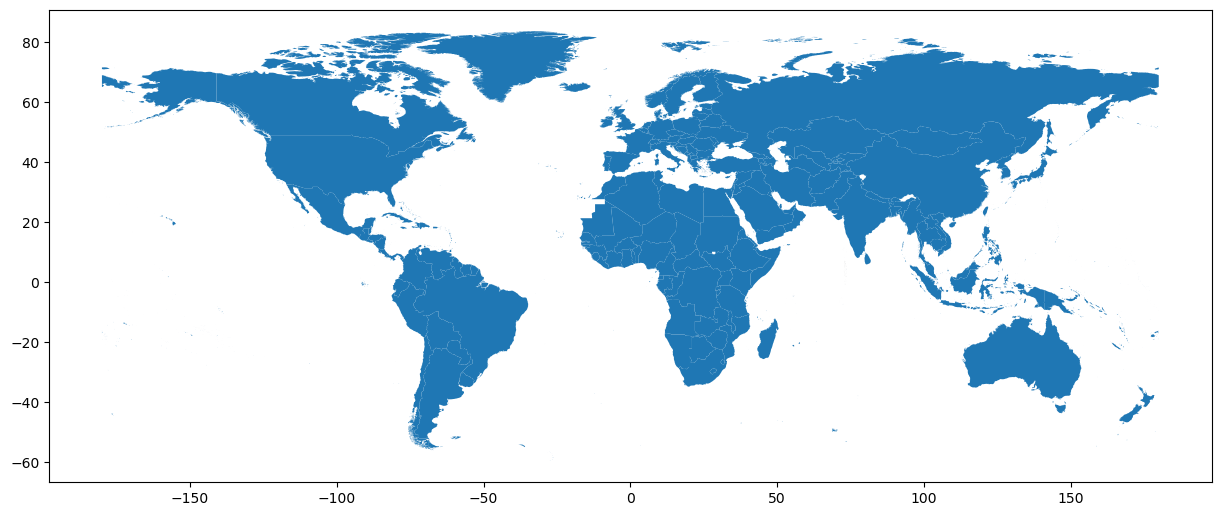

In [1]:
import geopandas as gpd

gdf = gpd.read_file("./world_bank/boundaries/wb_countries_admin0_10m/WB_countries_Admin0_10m.shp",encoding='utf-8')
print(gdf.columns.values)

gdf.plot(figsize=(15,15))

In [2]:
import pandas as pd


# Read CSV file
df = pd.read_csv("./world_bank/population/API_SP.POP.TOTL_DS2_en_csv_v2_3401680/world_pop.csv")

# Convert the data types of the columns to be the same
gdf['WB_A3'] = gdf['WB_A3'].astype(str)
df['Country Code'] = df['Country Code'].astype(str)

# Merge the GeoDataFrame and DataFrame on the specified keys
merged_gdf = gdf.merge(df, left_on="WB_A3", right_on="Country Code", how="inner")

# Print the merged GeoDataFrame
print(merged_gdf)



     OBJECTID       featurecla  LEVEL               TYPE  \
0           1  Admin-0 country      2  Sovereign country   
1           2  Admin-0 country      2  Sovereign country   
2           3  Admin-0 country      2  Sovereign country   
3           4  Admin-0 country      2  Sovereign country   
4           5  Admin-0 country      2  Sovereign country   
..        ...              ...    ...                ...   
208       231  Admin-0 country      2         Dependency   
209       232  Admin-0 country      2  Sovereign country   
210       234  Admin-0 country      2            Country   
211       238  Admin-0 country      2            Country   
212       251  Admin-0 country      2            Country   

                                        FORMAL_EN FORMAL_FR    POP_EST  \
0                           Republic of Indonesia       NaN  260580739   
1                                        Malaysia       NaN   31381992   
2                               Republic of Chile       N

In [15]:
# Ensure the geometry column has an area calculation (in square kilometers for example)
jpn_gdf = merged_gdf[merged_gdf["Country Name"] == 'Japan']
print(jpn_gdf['geometry'].area * 10000)

170    381713.826404
dtype: float64


C:\Users\nyama\AppData\Local\Temp\ipykernel_66576\851941700.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(jpn_gdf['geometry'].area * 10000)


C:\Users\nyama\AppData\Local\Temp\ipykernel_66576\805437637.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_gdf['area_km2'] = merged_gdf['geometry'].area * 10000


終了しました。


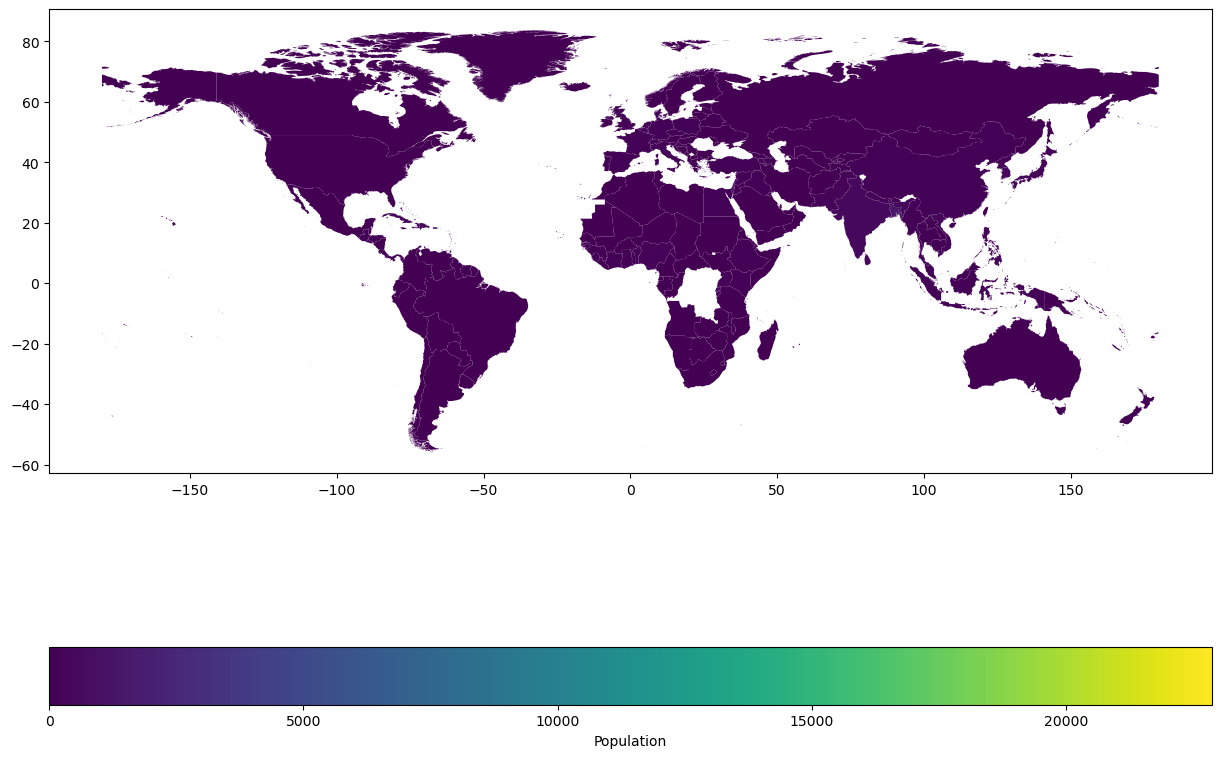

In [23]:
# Ensure the geometry column has an area calculation (in square kilometers for example)
merged_gdf['area_km2'] = merged_gdf['geometry'].area * 10000

# Calculate population density
merged_gdf['pop_density'] = merged_gdf['POP_EST'] / merged_gdf['Shape_Area'] / 10000

# Plot the population density map
merged_gdf.plot(figsize=(15, 15), column="pop_density", legend=True, legend_kwds={"label": "Population", "orientation": "horizontal"})


# geojsonデータを保存する。
merged_gdf.to_file("../world_pop_density.geojson", driver='GeoJSON', encoding='utf-8')
print("終了しました。")
